<a href="https://colab.research.google.com/github/chitransh0052/Gen-AI-Workshop/blob/master/GEN_AI_DAY1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D    #Layers of the model
from tensorflow.keras.datasets import mnist #dataset
from tensorflow.keras.utils import to_categorical #it convets labels to one-hot format
import matplotlib.pyplot as plt   #it is for plots or graphs
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
import random

In [2]:
#Step 1 Load and pre process the mnist datset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
#Step 2 normalize pixel value to range(0,1)
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
#Step 3 convert the labels to one hot encoded form
y_train=to_categorical(y_train,10)   #10 classes and digits will be 0 to 9
y_test=to_categorical(y_test,10)

In [5]:
#build the neural network model
model=Sequential([
    #flatten 28*28 impages to 1d vector of 784 features
    Flatten(input_shape=(28,28)),
    # first hiddden layers layers:128 neurons +relu activation
    Dense(128,activation='relu'),
    #dropout layer randomly drop 30% of neuron to reduce the overfitting
    Dropout(0.3),
    #second hidden layer: 64 neurons
    Dense(64,activation='relu'),
    Dropout(0.3),
    #output layers: 10 neurons for 10 classes+ softmax activation
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#Step 4 Compile the model
#adam optimizer + categorical cross entropy loss for multi class classification
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [7]:
#Step 5 Train the model
#train with 10 epochs , batch aize 32 and 10% validation split
history=model.fit (
    x_train,y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7842 - loss: 0.6892 - val_accuracy: 0.9617 - val_loss: 0.1234
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9350 - loss: 0.2255 - val_accuracy: 0.9723 - val_loss: 0.1003
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9487 - loss: 0.1715 - val_accuracy: 0.9742 - val_loss: 0.0937
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9562 - loss: 0.1484 - val_accuracy: 0.9740 - val_loss: 0.0889
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9631 - loss: 0.1264 - val_accuracy: 0.9782 - val_loss: 0.0775
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9635 - loss: 0.1155 - val_accuracy: 0.9780 - val_loss: 0.0731
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9676 - loss: 0.1102 - val_accuracy: 0.9780 - val_loss: 0.0732
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9681 - loss: 0.10

In [8]:
#Step 6 evaluate the model
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print(f'\n Test accuracy:{test_acc:.4f}')
print(f"Test loss:{test_loss:.4f}")


 Test accuracy:0.9767
Test loss:0.0847


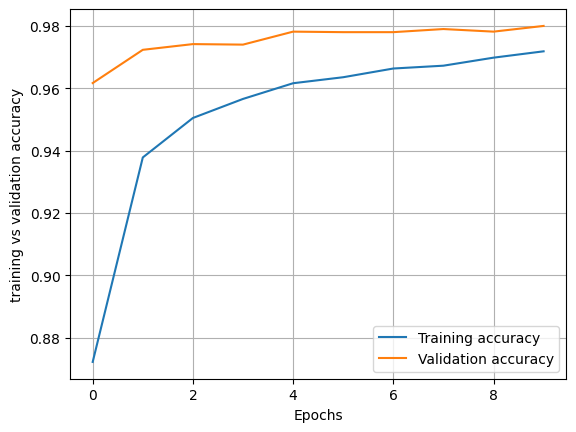

In [9]:
#Step 7 plot trainig and validation accuracy
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('training vs validation accuracy')
plt.legend()
plt.grid(True)
plt.show()